# Individual Assessment 
##### Enrico Romano 753321

## The dataset

The first step is to import the libraries and the dataset. Then, a useful step is to rename the columns for better understanding.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
missing_values = ["n/a", "na", "-"]
cities=pd.read_csv("healthy_lifestyle_city_2021.csv",na_values=missing_values).rename(columns={'Life expectancy(years) (Country)':'Life expectancy',
                                                            'Pollution(Index score) (City)':'Pollution',
                                                            'Sunshine hours(City)':'Sunshine hours',
                                                                      'Cost of a bottle of water(City)':'Cost of a bottle of water',
                                                                     'Outdoor activities(City)':'Outdoor activities',
                                                                     'Number of take out places(City)':'No of takes out places',
                                                                     'Cost of a monthly gym membership(City)':'Cost of monthly gym membership',
                                                                     })
cities.head()

,City,Rank,Sunshine hours,Cost of a bottle of water,Obesity levels(Country),Life expectancy,Pollution,Annual avg. hours worked,Happiness levels(Country),Outdoor activities,No of takes out places,Cost of monthly gym membership
0,Amsterdam,1,1858.0,£1.92,20.40%,81.2,30.93,1434.0,7.44,422,1048,£34.90
1,Sydney,2,2636.0,£1.48,29.00%,82.1,26.86,1712.0,7.22,406,1103,£41.66
2,Vienna,3,1884.0,£1.94,20.10%,81.0,17.33,1501.0,7.29,132,1008,£25.74
3,Stockholm,4,1821.0,£1.72,20.60%,81.8,19.63,1452.0,7.35,129,598,£37.31
4,Copenhagen,5,1630.0,£2.19,19.70%,79.8,21.24,1380.0,7.64,154,523,£32.53


## 1 - Checking for missing values

In [3]:
print(cities.isnull().sum())

City                               0
Rank                               0
Sunshine hours                     1
Cost of a bottle of water          0
Obesity levels(Country)            0
Life expectancy                    0
Pollution                          1
Annual avg. hours worked          11
Happiness levels(Country)          0
Outdoor activities                 0
No of takes out places             0
Cost of monthly gym membership     0
dtype: int64


In order to understand how to replace missing values, a good way to proceed is to construct boxplots for the variables of interest to see if there are many outliers (which have a strong influence on the mean).

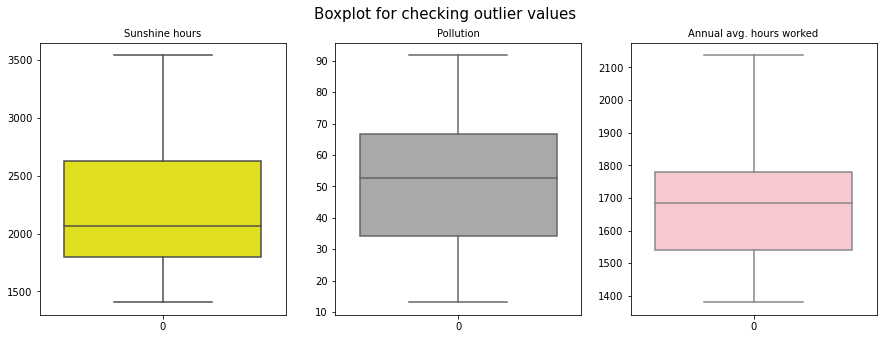

In [4]:
fig= plt.figure(figsize=(15,5))
fig.suptitle("Boxplot for checking outlier values",fontsize=15)
fs = fig.add_gridspec(1,3)
fig1 = fig.add_subplot(fs[0,0])
box1=sns.boxplot(data=cities['Sunshine hours'],color='yellow')
box1.set_title('Sunshine hours',fontsize=10)
fig2 = fig.add_subplot(fs[0,1])
box2=sns.boxplot(data=cities['Pollution'],color='darkgrey')
box2.set_title('Pollution',fontsize=10)
fig3 = fig.add_subplot(fs[0,2])
box3=sns.boxplot(data=cities['Annual avg. hours worked'],color='pink')
_=box3.set_title('Annual avg. hours worked',fontsize=10)


As shown from the plots above, there are not outlier values that influence the mean of the distributions. So, it is possible to replace the missing values with the mean of each distribution.

In [5]:
cities=cities.fillna(cities.mean())
cities=cities.round(2)

## 2 - Bar chart 
Plot a bar chart describing the Happiness levels for each city. The bars should be colored in gray
except for the bars corresponding to Italian cities which should be colored in dark blue.

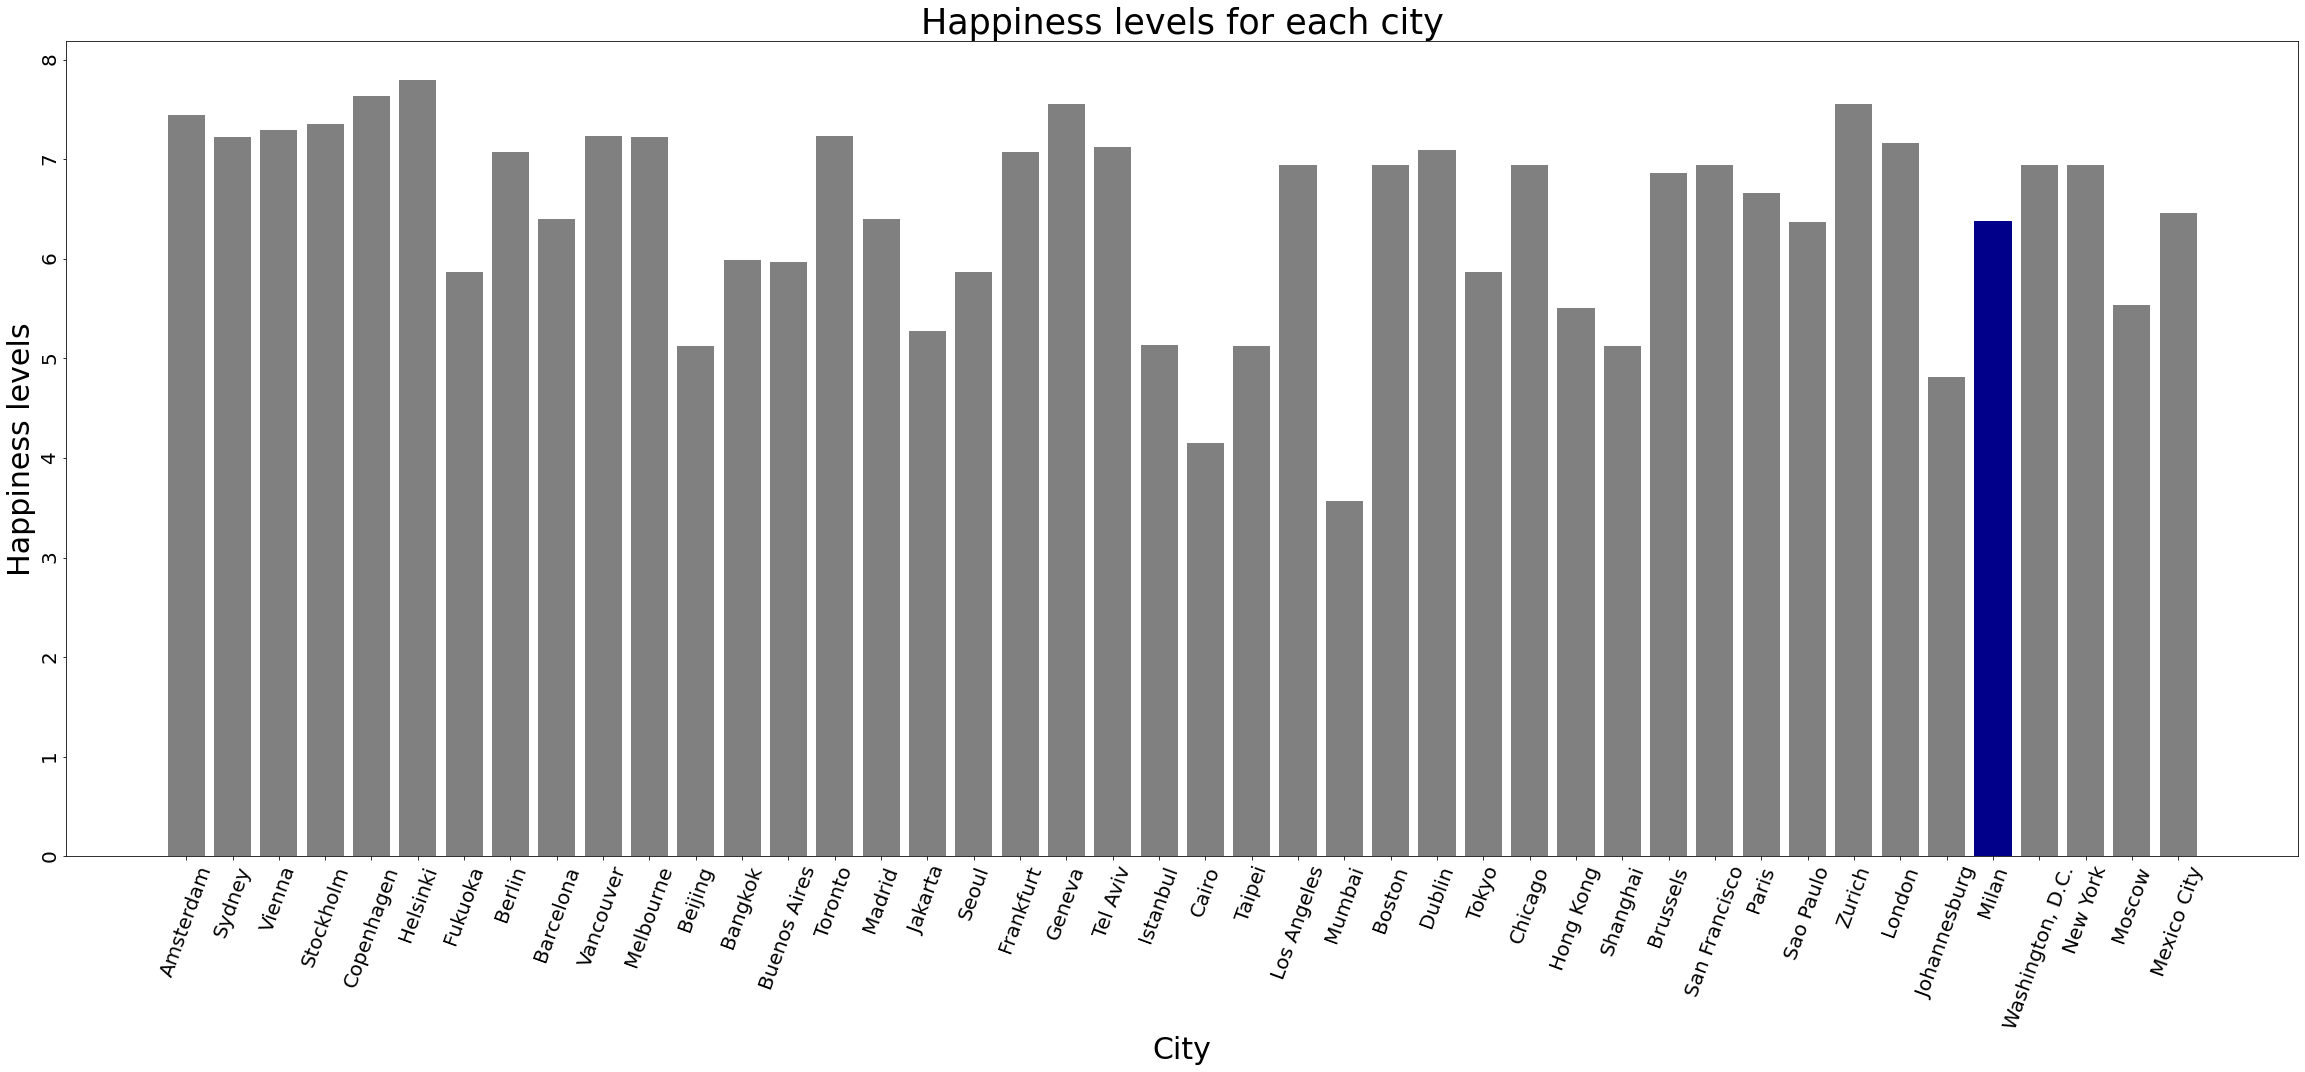

In [6]:
plt.figure(figsize=(40,15))
barlist=plt.bar(cities['City'],cities['Happiness levels(Country)'],color="grey")
barlist[39].set_color('darkblue')
plt.xticks(rotation=70,size=20)
plt.yticks(rotation=90,size=20)
_=plt.title('Happiness levels for each city', fontsize=35)
_=plt.xlabel('City',fontsize=30)
_=plt.ylabel('Happiness levels',fontsize=30)
plt.show()

## 3- Correlation 
Plot the correlation between any two pair of variables as a heatmap with a custom palette. What can
you say about the result? 

Starting with the creation of a custom palette.

In [7]:
colors = ['#A2B5CD','#B0E2FF',"#87CEFA",'#00C78C','#20B2AA','#2E8B57'] 
customPalette = sns.set_palette(sns.color_palette(colors))

The Rank variable can be removed, because python consider it as a quantitative variable rather than quanlitative and this influence the correlation.  

In [8]:
df2=cities.drop('Rank',axis=1)

In [9]:
df_corr=df2.corr()

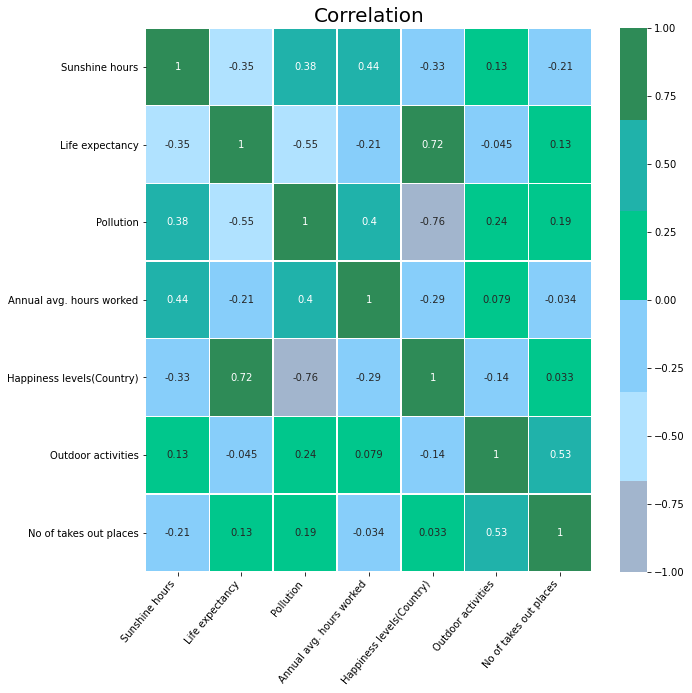

In [10]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(df_corr,vmin=-1, vmax=1, cmap=colors,center=0, annot=True,linewidth=.5) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, horizontalalignment='right')
ax.xaxis.set_label_text("")
_=ax.set_title("Correlation",fontsize=20)

The heatmap shows something interesting result:
- First of all, there is a strong positive correlation between 'life expectancy' and ' happiness level', this means that as 'happiness level' increases, so does the 'life expectancy'.
- There is also a positive correlation between 'outdoor activities' and 'number of takes out places', this means that in cities which have a huge number of 'outdoor actiivties' there are also a lot of takes out places.
- However, there is a negative correlation between 'pollution' and 'happiness level', this means that if a city has a high level of 'pollution', the citizens will have a lower 'happiness level'.
- Similarly, 'pollution' is also negatively correlated with 'life expectancy'(cities with high level of pollution have a lower life expectacy level than the average).
- 'Life expectacy' is negatively correlated with 'annual avg. hours worked'. So, if the 'annual avg. hours worked' increases, the 'life expectacy' will decrease. 
- In conclusion, the latest interesting correlation is between 'Sunshine hours' and 'Annual avg. hours worked'. In fact, from the heatmap we can note that if 'Sunshine hours' increases, also 'Annual avg. hours worked' will increase.

## 4-  Bar chart for groups
Divide the cities into 6 groups based on the first letter of their name (A-D, E-H, I-L, M-P, Q-U, V-Z).
Plot a bar chart for the “Number of take out places” variable with six bins (A-D, E-H, I-L, M-P, Q-U,
V-Z). Each bin contains the sum of the values of “Number of take out places” for the cities that fall
in that bin.

In [11]:
city=cities['City']
alph=tuple('ABCDEFGHIJKLMNOPQRSTUWXYZ')
result=[]
for i in city:
    if i.startswith(alph[0:4]):
        result.append("A-D")
    elif i.startswith(alph[4:8]):
        result.append("E-H")
    elif i.startswith(alph[8:12]):
        result.append("I-L")
    elif i.startswith(alph[12:16]):
        result.append("M-P")
    elif i.startswith(alph[16:20]):
        result.append("Q-U")
    else:
        result.append("V-Z")
        
cities['City Group']=result

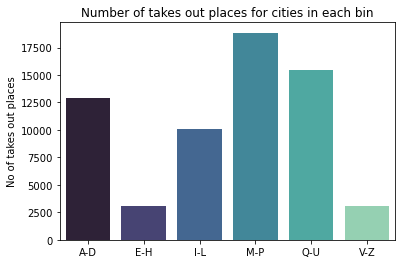

In [12]:
lx=sns.barplot(x='City Group',y='No of takes out places',data=cities.groupby('City Group').sum().reset_index(),palette='mako')
lx.xaxis.set_label_text("")
_=lx.set_title("Number of takes out places for cities in each bin")

## 5- Plot the graphics as described in Figure 1


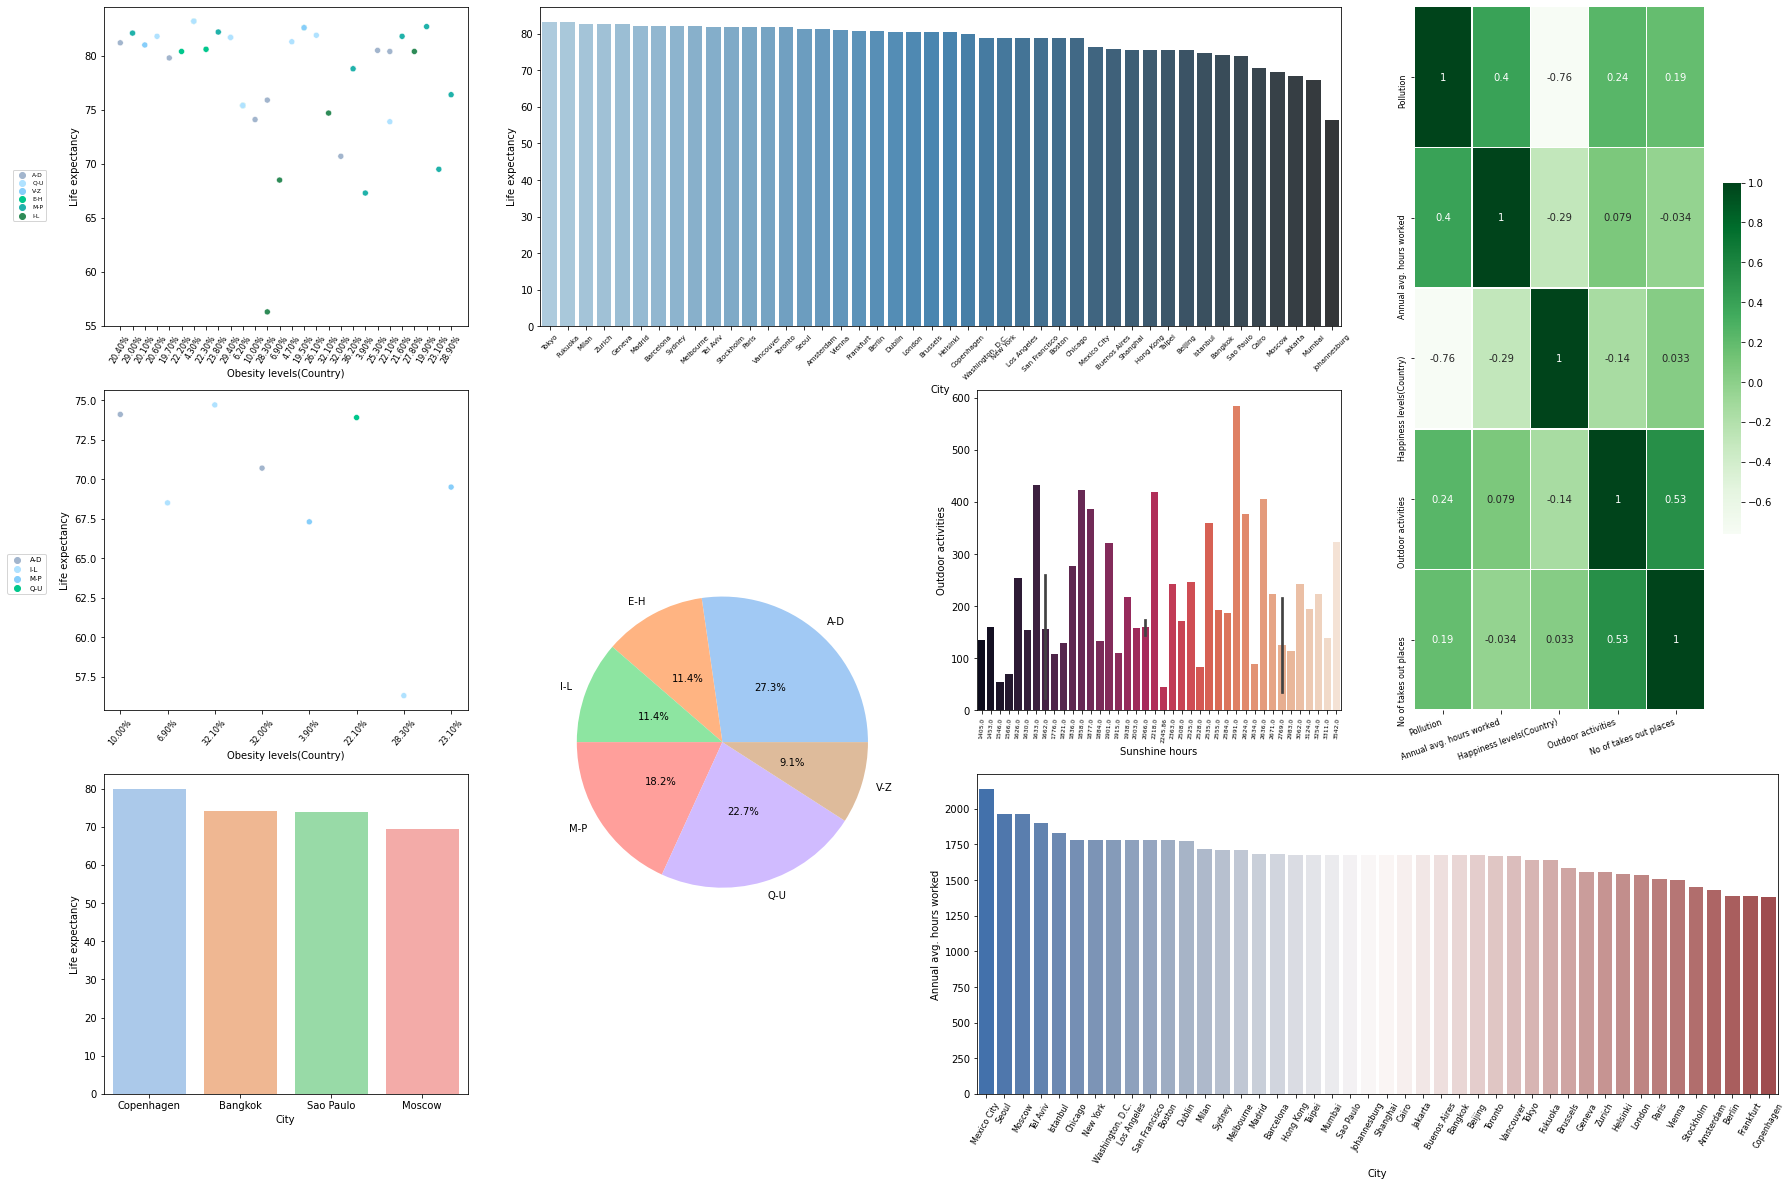

In [15]:
f2 = plt.figure(figsize=(30,20),constrained_layout=False)
gs = f2.add_gridspec(3, 4)

# life expentancy vs obesity level
f2_ax1 = f2.add_subplot(gs[0,0])
_=sns.scatterplot(data = cities, x ="Obesity levels(Country)" , y = "Life expectancy",hue="City Group")
plt.xticks(rotation=60,size=8)
_=plt.legend(bbox_to_anchor=(-0.15,0.5),prop={"size":6})


#bar plot life expectancy
f2_ax2 = f2.add_subplot(gs[0,1:3])
_=sns.barplot(x='City',y='Life expectancy',data=cities.sort_values('Life expectancy',ascending=False),palette="Blues_d")
plt.xticks(rotation=45,size=7)


# heatmap of correlation between last 5 variables
f2_ax3 = f2.add_subplot(gs[:-1,3])
data={'Pollution':cities['Pollution'],
      'Annual avg. hours worked':cities['Annual avg. hours worked'],
     'Happiness levels(Country)':cities['Happiness levels(Country)'],
     'Outdoor activities':cities['Outdoor activities'],
     'No of takes out places':cities['No of takes out places'],
     'Cost of monthly gym membership':cities['Cost of monthly gym membership']}
df5=pd.DataFrame(data)
corr1=df5.corr()
g=sns.heatmap(corr1,cmap='Greens',annot=True,cbar_kws={"shrink": .5},linewidth=.5)
g.set_xticklabels(g.get_xticklabels(), rotation=20, horizontalalignment='right',fontsize=8)
g.set_yticklabels(g.get_yticklabels(), rotation=90, horizontalalignment='right',fontsize=8)

#life expectancy < 75 in a non-increasing order
f2_ax4 = f2.add_subplot(gs[1,0])
_=sns.scatterplot(data = cities[cities['Life expectancy']<75], x ="Obesity levels(Country)" , y = "Life expectancy",hue="City Group")
plt.xticks(rotation=50,size=8)
_=plt.legend(bbox_to_anchor=(-0.15,0.5),prop={"size":7})



#Pie chart
f2_ax5 = f2.add_subplot(gs[1:,1])
df_pie=cities.groupby('City Group').size().to_frame('City_Group')
labels = df_pie.index.tolist()
data = df_pie.City_Group.tolist()
colors = sns.color_palette('pastel')
_=plt.pie(x = data, autopct="%.1f%%", labels=labels, pctdistance=0.5, colors=colors)

#sunshine hours vs outdoor activities
f2_ax6 = f2.add_subplot(gs[1,2])
_=sns.barplot(x='Sunshine hours',y='Outdoor activities',data=cities,palette="rocket")
plt.xticks(rotation=85,size=6)

# Bar plot without cities with life expectacy >80 and obesity levels >25%
f2_ax7 = f2.add_subplot(gs[2,0])
cities2=cities.loc[(cities['Life expectancy']<80) & (cities['Obesity levels(Country)']<'25%')]
_=sns.barplot(x='City',y='Life expectancy',data=cities2.sort_values('Life expectancy',ascending=False),palette="pastel")


#Free-choice chart
f2_ax8= f2.add_subplot(gs[2,2:])
_=sns.barplot(x='City',y='Annual avg. hours worked',data=cities.sort_values('Annual avg. hours worked',ascending=False),palette="vlag")
_=plt.xticks(rotation=60,size=8)